# Text Representation using Neural Models or Text Embeddings

## Common Imports

In [5]:
import pandas as pd
import re
import numpy as np

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

import nltk
from nltk import sent_tokenize, word_tokenize
STOPWORDS = nltk.corpus.stopwords.words('english')

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Word2Vec Model using Gensim

In [6]:
import nltk
from gensim.models import word2vec

In [7]:
sample = '''This will be followed by more of the same with the mist and fog clearing to give a day of unbroken sunshine 
everywhere on Tuesday and temperatures of between 22 and 27 degrees. It will warmest in the midlands. Temperatures 
could reach a September record for the century in Ireland, but are unlikely to surpass the 29.1 degrees recorded 
at Kildare’s Clongowes Wood College on September 1st, 1906. Tuesday, however, will be the last day of the sunshine 
with rain arriving across the country on Wednesday morning. Temperatures will remain as high as 24 degrees with the 
warmth punctuated by heavy showers.'''

cleaned_sample = re.sub("[^A-Za-z0-9\s.]", "" , sample.replace('\n', '').lower())
tokens_docs = [word_tokenize(doc) for doc in sent_tokenize(cleaned_sample)]
print(tokens_docs) # FORMAT - [[tokens], [tokens], ...]    

[['this', 'will', 'be', 'followed', 'by', 'more', 'of', 'the', 'same', 'with', 'the', 'mist', 'and', 'fog', 'clearing', 'to', 'give', 'a', 'day', 'of', 'unbroken', 'sunshine', 'everywhere', 'on', 'tuesday', 'and', 'temperatures', 'of', 'between', '22', 'and', '27', 'degrees', '.'], ['it', 'will', 'warmest', 'in', 'the', 'midlands', '.'], ['temperatures', 'could', 'reach', 'a', 'september', 'record', 'for', 'the', 'century', 'in', 'ireland', 'but', 'are', 'unlikely', 'to', 'surpass', 'the', '29.1', 'degrees', 'recorded', 'at', 'kildares', 'clongowes', 'wood', 'college', 'on', 'september', '1st', '1906.', 'tuesday', 'however', 'will', 'be', 'the', 'last', 'day', 'of', 'the', 'sunshine', 'with', 'rain', 'arriving', 'across', 'the', 'country', 'on', 'wednesday', 'morning', '.'], ['temperatures', 'will', 'remain', 'as', 'high', 'as', '24', 'degrees', 'with', 'the', 'warmth', 'punctuated', 'by', 'heavy', 'showers', '.']]


In [8]:
len(tokens_docs)

4

In [10]:
w2v_model = word2vec.Word2Vec(
    tokens_docs,
    vector_size=15,  # Dimensionality of the word vectors
    window=20,
    min_count=1,
    sg=1  # 1 for skip-gram; otherwise CBOW
)
w2v_model

### Vocab Length

In [11]:
len(w2v_model.wv)

69

Recall vocab length from the traditional text representation techniques.

In [14]:
w2v_model_min_2 = word2vec.Word2Vec(tokens_docs, 
                              vector_size=15, # Dimensionality of the word vectors
                              window=20, 
                              min_count = 2, # min_count -> min frequency of the words
                              sg=1 # 1 for skip-gram; otherwise CBOW
                             )
len(w2v_model_min_2.wv)

19

Only the words occuring at least twice are taken in the vocab.

**Compare the vocabulary list below:**

In [15]:
w2v_model.wv.key_to_index.keys()

dict_keys(['the', '.', 'of', 'will', 'temperatures', 'degrees', 'and', 'with', 'on', 'as', 'tuesday', 'by', 'september', 'to', 'a', 'day', 'sunshine', 'be', 'in', 'warmest', 'it', '27', '22', 'between', 'showers', 'everywhere', 'unbroken', 'midlands', 'clearing', 'fog', 'mist', 'same', 'more', 'followed', 'give', 'reach', 'could', '1st', 'punctuated', 'warmth', '24', 'high', 'remain', 'morning', 'wednesday', 'country', 'across', 'arriving', 'rain', 'last', 'however', '1906.', 'college', 'heavy', 'wood', 'clongowes', 'kildares', 'at', 'recorded', '29.1', 'surpass', 'unlikely', 'are', 'but', 'ireland', 'century', 'for', 'record', 'this'])

In [16]:
w2v_model_min_2.wv.key_to_index.keys()

dict_keys(['the', 'will', '.', 'of', 'and', 'degrees', 'temperatures', 'on', 'with', 'be', 'by', 'as', 'to', 'a', 'september', 'sunshine', 'tuesday', 'in', 'day'])

### Access individual word vectors

In [17]:
w2v_model.wv.get_vecattr('temperatures', 'count')

3

In [18]:
w2v_model.wv.get_vector('temperatures')

array([-0.0147046 ,  0.00228739, -0.0238871 , -0.05104966, -0.01161999,
        0.01646438, -0.00502478,  0.04013832, -0.01883712,  0.01292312,
        0.03867809,  0.05811823, -0.00908627, -0.06368177,  0.02897147],
      dtype=float32)

In [19]:
w2v_model.wv.get_vector('temperatures').shape

(15,)

Recall that we set the dimensionality of the word vectors to 15.

In [20]:
w2v_model.wv.get_vecattr('the', 'count')

9

In [21]:
w2v_model.wv.get_vector('the')

array([-0.01140261,  0.00190468,  0.04043645,  0.06003004, -0.06516874,
       -0.04895813,  0.04444015,  0.06538092, -0.03482677, -0.02967181,
        0.0532735 , -0.00548372, -0.0289843 ,  0.03815921, -0.03182162],
      dtype=float32)

### Access the "word-vectored" data

In [25]:
vocab = w2v_model.wv.key_to_index.keys()
w2v_model.wv[vocab]

array([[-1.1402611e-02,  1.9046798e-03,  4.0436450e-02, ...,
        -2.8984297e-02,  3.8159210e-02, -3.1821616e-02],
       [-1.2400398e-02,  1.9226646e-02,  6.9411662e-03, ...,
         3.8531020e-02, -5.0307196e-02, -2.6381129e-02],
       [-5.4147925e-02, -5.7135280e-03,  6.7539975e-02, ...,
        -5.7643931e-02, -3.1993464e-02, -5.6539397e-05],
       ...,
       [-6.7239940e-02,  5.8218200e-02,  3.3021316e-02, ...,
         5.4190364e-02, -6.7756347e-02, -5.3310331e-02],
       [-4.4269148e-02, -2.6689705e-02,  3.3261441e-02, ...,
        -1.8792026e-02,  1.8994156e-02, -5.5041585e-02],
       [-1.9949375e-02, -1.6725747e-02,  4.9254879e-02, ...,
         6.1450917e-02,  5.1041387e-02,  4.2342711e-02]], dtype=float32)

In [26]:
w2v_model.wv[vocab].shape # vocab x dimension of wv

(69, 15)

### Most Similar Terms

In [33]:
w2v_model.wv.most_similar('day', topn=10)

[('september', 0.6265420317649841),
 ('country', 0.6069667935371399),
 ('mist', 0.5587335824966431),
 ('between', 0.5156576633453369),
 ('ireland', 0.4646913409233093),
 ('as', 0.45744678378105164),
 ('remain', 0.4333852231502533),
 ('followed', 0.4264555275440216),
 ('wood', 0.374166339635849),
 ('reach', 0.37385469675064087)]

In [28]:
w2v_model.wv.most_similar('country', topn=3)

[('day', 0.6069667339324951),
 ('ireland', 0.5782530903816223),
 ('of', 0.5406787991523743)]

In [30]:
# Given a list of keys which is a subset of the vocab, which of the keys is most similar to the given key.
# syntax w2v_model.wv.most_similar_to_given(given_key, subset of the vocab)

w2v_model.wv.most_similar_to_given('country', ['september', 'ireland', 'day'])

'day'

In [31]:
w2v_model.wv.most_similar_to_given('country', ['september', 'ireland', 'of'])

'ireland'

In [32]:
w2v_model.wv.most_similar_to_given('country', ['midlands', 'college', 'unlikely'])

'midlands'

### Visualizing a Word2Vec model

**Using PCA**

In [34]:
from sklearn.decomposition import PCA

In [35]:
def plot_similarity_PCA(model, word_vector):
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vector)
    print(result.shape)
    plt.scatter(
        result[:, 0], # column (dimesion) 1
        result[:, 1], # column (dimension) 2
        color='b'
    )
    # annotation or printing words in the plot
    for i, word in enumerate(vocab):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

(69, 2)


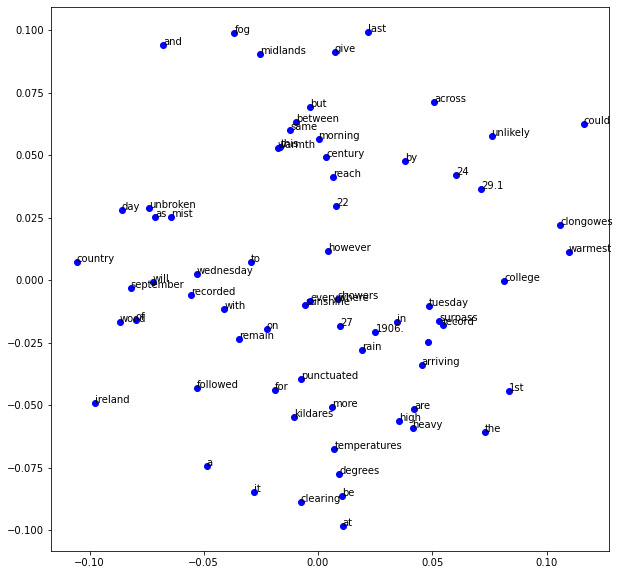

In [36]:
plt.figure(figsize=[10, 10])
plot_similarity_PCA(w2v_model, w2v_model.wv[vocab])

**Using T-SNE**

In [37]:
# visualize embeddings
from sklearn.manifold import TSNE

In [42]:
def plot_similarity_TSNE(model, word_vector):
    tsne = TSNE(n_components=2)
    result = tsne.fit_transform(word_vector)
    print(result.shape)
    plt.scatter(
        result[:, 0],
        result[:, 1],
        color='r'
    )
    for i, word in enumerate(vocab):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

(69, 2)


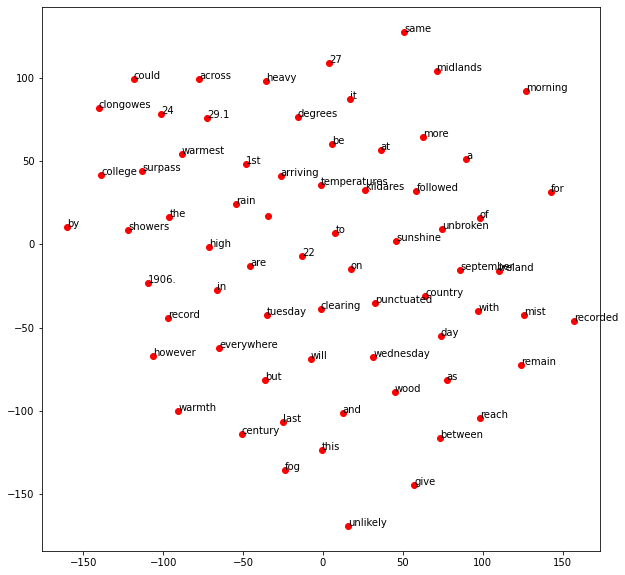

In [41]:
plt.figure(figsize=[10, 10])
plot_similarity_TSNE(w2v_model, w2v_model.wv[vocab])

## GloVe 

Stanford Project Link - https://nlp.stanford.edu/projects/glove/

### GloVe file vs Word2vec file

In [43]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = 'test_glove.txt'
w2v_file = "test_word2vec.txt"
glove2word2vec(glove_file, w2v_file)

(12, 4)

In [44]:
model = KeyedVectors.load_word2vec_format(w2v_file)

### Loading GloVe

In [48]:
from gensim.test.utils import get_tmpfile

glove_file = r'C:\Users\nroy0\Documents\Resources\glove.6B\glove.6B.300d.txt'
w2v_file = get_tmpfile("glove_w2v.txt")
glove2word2vec(glove_file, w2v_file)

(400000, 300)

In [55]:
w2v_model = KeyedVectors.load_word2vec_format(w2v_file)

In [50]:
w2v_model.most_similar('day', topn=10)

[('days', 0.7640018463134766),
 ('week', 0.7369102835655212),
 ('morning', 0.6845975518226624),
 ('month', 0.6697549819946289),
 ('weekend', 0.6642025113105774),
 ('afternoon', 0.6569607853889465),
 ('next', 0.655013382434845),
 ('friday', 0.6493477821350098),
 ('last', 0.6458969116210938),
 ('night', 0.638271152973175)]

In [51]:
vocab = w2v_model.key_to_index.keys()

In [52]:
glove_embedding_matrix = w2v_model[vocab]
glove_embedding_matrix

array([[ 0.04656  ,  0.21318  , -0.0074364, ...,  0.0090611, -0.20989  ,
         0.053913 ],
       [-0.25539  , -0.25723  ,  0.13169  , ..., -0.2329   , -0.12226  ,
         0.35499  ],
       [-0.12559  ,  0.01363  ,  0.10306  , ..., -0.34224  , -0.022394 ,
         0.13684  ],
       ...,
       [ 0.075713 , -0.040502 ,  0.18345  , ...,  0.21838  ,  0.30967  ,
         0.43761  ],
       [ 0.81451  , -0.36221  ,  0.31186  , ...,  0.075486 ,  0.28408  ,
        -0.17559  ],
       [ 0.429191 , -0.296897 ,  0.15011  , ...,  0.28975  ,  0.32618  ,
        -0.0590532]], dtype=float32)

In [53]:
glove_embedding_matrix.shape # recall we used 300d

(400000, 300)

In [54]:
w2v_model.get_vector('day')

array([-2.4501e-01, -1.2491e-01, -2.5360e-01,  3.3819e-01, -1.0528e-01,
        1.7239e-01, -2.4134e-01,  1.4848e-01, -2.0182e-02, -1.3848e+00,
        3.1645e-01,  3.4334e-02, -1.8420e-01,  1.4910e-01, -8.9714e-02,
       -9.4922e-02,  2.3930e-01, -4.5581e-02, -4.2978e-01, -1.3370e-01,
       -1.0194e-01, -2.7081e-01,  1.4754e-02, -5.2341e-02,  4.1858e-01,
       -4.0219e-01,  1.8050e-01, -7.8451e-02,  2.9607e-02, -1.7606e-01,
        2.2696e-01,  2.0873e-01, -1.3787e-01,  3.7559e-01, -1.4496e+00,
        5.0912e-02,  1.1853e-01,  2.3446e-02, -3.9657e-01, -2.2475e-02,
       -2.0252e-01,  6.5408e-02,  7.9219e-02,  7.4154e-02,  1.3425e-01,
       -1.0429e-01,  3.4589e-01,  2.1272e-01, -2.8454e-01, -1.5088e-01,
       -2.0410e-01, -3.1680e-01, -1.0629e-01,  1.8745e-01, -1.4599e-01,
        5.9753e-01, -1.3556e-02,  4.6395e-01,  3.0307e-01, -1.1303e-01,
        2.2118e-01, -3.6687e-01,  3.0545e-01, -1.9835e-01, -2.2105e-01,
       -5.0803e-01, -4.5341e-02,  6.0273e-03, -3.1564e-01, -7.92

In [ ]:
list_sample_tokens = [each_token for each_seq in tokens_docs for each_token in each_seq if each_token not in STOPWORDS]
unique_tokens = list(set(list_sample_tokens))
unique_tokens

In [ ]:
# Create a numpy array of zeroes of shape of the vocab_size and the dimension you have chosen
# In our case it is 300d

sample_glove_embedding_matrix = np.zeros((len(unique_tokens), 300))
sample_glove_embedding_matrix.shape

In [ ]:
for i, each_token in enumerate(unique_tokens):
    try:
        sample_glove_embedding_matrix[i] = w2v_model.get_vector(each_token)
    except KeyError as e:
        print(e)
        print("In the matrix, the vector at position {} is zero.".format(i))
sample_glove_embedding_matrix

In [ ]:
sample_glove_embedding_matrix.shape

In [ ]:
sample_glove_embedding_matrix[17]